In [1]:
#Summarize the data to get a sense of Cybersecurity Culture in Organizations working on NGS.
#This includes Kruskal-Wallis Test: Summarize responses related to Compare cybersecurity culture across different organizational groups or 
#departments working with Next generation Sequencing by using all the relevant questions.
import pandas as pd
from scipy.stats import kruskal

In [2]:
file_path = "cleaneddata_NGS.csv"
df = pd.read_csv(file_path)

In [3]:
# Relevant columns to analyze and the grouping variable (assuming 'department' or similar exists in the dataset)
columns_to_analyze = [
    #25
    'How would you describe the overall culture of cybersecurity within your organization',
    #33
    'Do you collaborate with cybersecurity experts or professionals to enhance the security posture of NGS systems and data',
    #36
    'Does your organization have clear and accessible cybersecurity policies specific to NGS operations or sensitive healthcare data such as DNA sequencing data',
    #37
    'In the last year, how often has cybersecurity been discussed in your meetings or other organizational communications',
    #38
    'What methods does your organization use to communicate about cybersecurity issues (Select all that apply)'
]
group_column = 'Please indicate your role within the organization:' 

In [4]:
# Rename columns to be more concise
df.rename(columns={
   # 'Please indicate your role within the organization:'
   'How would you describe the overall culture of cybersecurity within your organization' : 'overall_culture',
    'Do you collaborate with cybersecurity experts or professionals to enhance the security posture of NGS systems and data': 'collaboration_with_experts',
    'Does your organization have clear and accessible cybersecurity policies specific to NGS operations or sensitive healthcare data such as DNA sequencing data': 'cs_policies',
    'In the last year, how often has cybersecurity been discussed in your meetings or other organizational communications': 'cs_meeting_discussions',
    'What methods does your organization use to communicate about cybersecurity issues (Select all that apply)': 'cs_communication_methods'
}, inplace=True)

In [5]:
# Update columns_to_analyze with the renamed columns
columns_to_analyze = [
   # 'role_in_organization',
    'overall_culture',
    'collaboration_with_experts',
    'cs_policies',
    'cs_meeting_discussions',
    'cs_communication_methods'
]

In [6]:
# Ensure that the grouping variable column exists in the DataFrame
if group_column not in df.columns:
    raise ValueError(f"The grouping variable column '{group_column}' does not exist in the dataset.")

In [7]:
# Mapping categorical responses to numerical values
def create_frequency_mapping(df, columns):
    unique_values = set()
    for col in columns:
        unique_values.update(df[col].dropna().unique())
    
    unique_values = sorted(list(unique_values))
    mapping = {value: index for index, value in enumerate(unique_values)}
    
    return mapping

In [8]:
# Create frequency mapping
frequency_mapping = create_frequency_mapping(df, columns_to_analyze)

In [9]:
# Convert relevant columns using the mapping
for col in columns_to_analyze:
    df[col] = df[col].map(frequency_mapping)

In [10]:
# Perform the Kruskal-Wallis test for each column
kruskal_results = {}
for col in columns_to_analyze:
    groups = [df[df[group_column] == group][col].dropna().values for group in df[group_column].unique()]
    stat, p_value = kruskal(*groups)
    kruskal_results[col] = {'statistic': stat, 'p_value': p_value}

In [11]:
# Display the Kruskal-Wallis test results
for col, results in kruskal_results.items():
    print(f"Kruskal-Wallis Test for {col}:")
    print(f"Statistic: {results['statistic']}")
    print(f"P-value: {results['p_value']}\n")

Kruskal-Wallis Test for overall_culture:
Statistic: 10.02928258428079
P-value: 0.186920114602577

Kruskal-Wallis Test for collaboration_with_experts:
Statistic: 11.325637589343703
P-value: 0.12503211993511362

Kruskal-Wallis Test for cs_policies:
Statistic: 7.210399398847184
P-value: 0.4073070128187818

Kruskal-Wallis Test for cs_meeting_discussions:
Statistic: 6.730885844619145
P-value: 0.457427445806885

Kruskal-Wallis Test for cs_communication_methods:
Statistic: 4.828322826128336
P-value: 0.6809045056251504



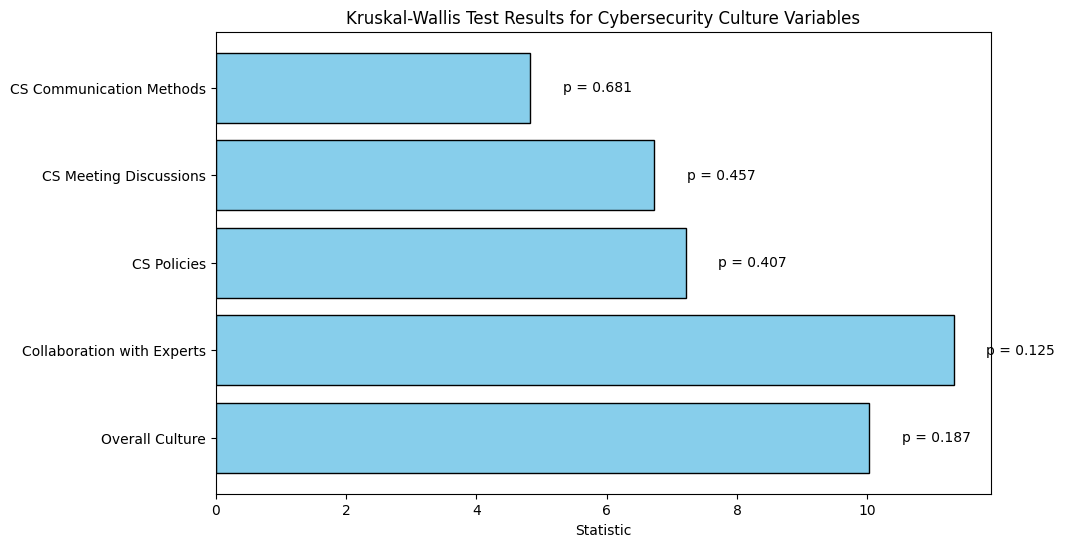

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Kruskal-Wallis test results
variables = [
    "Overall Culture",
    "Collaboration with Experts",
    "CS Policies",
    "CS Meeting Discussions",
    "CS Communication Methods"
]

statistics = [
    10.02928258428079,
    11.325637589343703,
    7.210399398847184,
    6.730885844619145,
    4.828322826128336
]

p_values = [
    0.186920114602577,
    0.12503211993511362,
    0.4073070128187818,
    0.457427445806885,
    0.6809045056251504
]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Kruskal-Wallis statistics
bars = ax1.barh(variables, statistics, color='skyblue', edgecolor='black')
ax1.set_xlabel('Statistic')
ax1.set_title('Kruskal-Wallis Test Results for Cybersecurity Culture Variables')

# Adding the p-values as text annotations
for bar, p_val in zip(bars, p_values):
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax1.text(width + 0.5, label_y, f'p = {p_val:.3f}', va='center', ha='left', fontsize=10)

# Display the plot
plt.show()